In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [ ]:
cf2017 = pd.read_csv('/content/drive/MyDrive/CF_2017.csv', index_col=0)

In [ ]:
cf2017

,1001A,1003A,1005A,1006A,1007A,1009A,1010A,1013A,1013C,1014A,...,6654A,6656A,8001C,8002C,8005C,8006C,8009C,8010C,8011C,8012C
1001A,1.000000,0.015129,0.000000,0.000000,0.000636,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
1003A,0.015129,1.000000,0.000428,0.000988,0.001651,0.002621,0.0,0.000070,0.0,0.001710,...,0.0,0.0,0.001432,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.001034
1005A,0.000000,0.000428,1.000000,0.000000,0.000126,0.000000,0.0,0.000000,0.0,0.000095,...,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
1006A,0.000000,0.000988,0.000000,1.000000,0.000291,0.000774,0.0,0.000062,0.0,0.000790,...,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
1007A,0.000636,0.001651,0.000126,0.000291,1.000000,0.005407,0.0,0.009111,0.0,0.047263,...,0.0,0.0,0.012442,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.000131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8006C,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.00000,0.000000,1.0,0.000000,0.000000,0.0,0.000000
8009C,0.000000,0.000000,0.000000,0.000000,0.000000,0.000089,0.0,0.000000,0.0,0.000057,...,0.0,0.0,0.000000,0.00769,0.000000,0.0,1.000000,0.166487,0.0,0.000000
8010C,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.166487,1.000000,0.0,0.000000
8011C,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,1.0,0.000000


In [ ]:
black_list = ['6453A', '6149A', '2422C', '4260C', '1391A', '4762A', '5232A', '5233A', '5234A', '1912A', '5055A', '3059A', '4952A', '2186A', '1149A', '2289A',
              '6349A', '6350A', '6351A', '6352A', '6396A', '5293A', '5294A', '4709A', '5042A',
              '6484A', '6485A', '6486A', '5204B', '2222A', '3672A', '1790A', '1590A', '5293A', '4928A', '4685A']

In [ ]:
len(black_list)

36

# 지역 변이계수의 합 이용

In [ ]:
sido_list = [11, 26, 27, 28, 29, 30, 31, 36, 41, 42, 43, 44, 45, 46, 47, 48, 49]

In [ ]:
for i in sido_list :
    globals()['cf2017_{}'.format(i)] = pd.read_csv('/content/drive/MyDrive/CF_2017_'+str(i)+'.csv', index_col=0)

In [ ]:
filtered_columns = [col for col in cf2017.columns if col not in black_list]
len(filtered_columns)

1577

In [ ]:
drugs = cf2017.columns

In [ ]:
drugs

Index(['1001A', '1003A', '1005A', '1006A', '1007A', '1009A', '1010A', '1013A',
       '1013C', '1014A',
       ...
       '6654A', '6656A', '8001C', '8002C', '8005C', '8006C', '8009C', '8010C',
       '8011C', '8012C'],
      dtype='object', length=1612)

In [ ]:
result_list = []

for j in black_list :
    merged_df = pd.DataFrame()
    for i in sido_list:
        df = globals()['cf2017_{}'.format(i)]
        if j not in df.columns:
            merged_df[i] = 0
            continue
        non_zero_df = df[j][ df[j] != 0 ]
        non_zero_df = non_zero_df.drop(index = j)
        merged_df[i] = non_zero_df

    merged_df = merged_df.fillna(0)
    merged_df['mean'] = merged_df.iloc[:, 0:17].mean(axis=1)
    merged_df['std'] = merged_df.iloc[:, 0:17].std(axis=1)
    merged_df['CV'] = merged_df['std']/merged_df['mean']
    result_list.append(merged_df['CV'].sum())
    print(merged_df['CV'].sum(), j)

533.1800550402959 6453A
1197.3878364226327 6149A
272.76907281556794 2422C
117.96117350085296 4260C
106.95930557067325 1391A
882.2434520868937 4762A
413.40838856573566 5232A
301.7664205749278 5233A
170.71088585895507 5234A
98.32464562258556 1912A
734.3485870928872 5055A
595.2978138065039 3059A
225.495812415529 4952A
311.53253353856235 2186A
111.88688070103983 1149A
193.46655578309716 2289A
200.13314947516184 6349A
331.8794969960197 6350A
55.12060387388995 6351A
198.1705554513532 6352A
530.0884623510628 6396A
419.0405007451586 5293A
58.51602467155357 5294A
1206.8573310110114 4709A
792.882066553902 5042A
343.54903501784827 6484A
433.4273531258311 6485A
296.0660588344522 6486A
24.738633753705965 5204B
1169.8907614877835 2222A
1226.0769599226696 3672A
1423.2658261231782 1790A
1001.0450983408476 1590A
419.0405007451586 5293A
868.3506752259373 4928A
902.3698659036392 4685A


In [ ]:
merged_df.to_csv('merged_df.csv')

In [ ]:
blacklist_cv = pd.read_csv('/content/drive/MyDrive/blacklist_cv.csv', index_col=0)
blacklist_cv.describe()

,CV,COUNT
count,36.000000,36.000000
mean,504.645788,23144.111111
std,399.850134,53243.381743
min,24.738634,5.000000
25%,196.994556,474.500000
50%,378.478712,1563.500000
75%,811.749219,11033.750000
max,1423.265826,243725.000000


In [ ]:
filtered_cv = pd.read_csv('/content/drive/MyDrive/filtered_cv.csv', index_col=0)
filtered_cv.describe()

,CV,COUNT
count,1578.000000,1.577000e+03
mean,375.164075,2.433001e+04
std,356.195842,9.679786e+04
min,0.000000,1.000000e+00
25%,50.935218,9.000000e+01
50%,264.673132,1.274000e+03
75%,642.142881,9.008000e+03
max,1357.470738,1.549835e+06


# non-rebate 전체와 비교

In [ ]:
result_list3 = []

for j in filtered_columns :
    merged_df = pd.DataFrame()
    for i in sido_list:
        df = globals()['cf2017_{}'.format(i)]
        if j not in df.columns:
            merged_df[i] = 0
            continue
        non_zero_df = df[j][ df[j] != 0 ]
        non_zero_df = non_zero_df.drop(index = j)
        merged_df[i] = non_zero_df

    merged_df = merged_df.fillna(0)
    merged_df['mean'] = merged_df.iloc[:, 0:17].mean(axis=1)
    merged_df['std'] = merged_df.iloc[:, 0:17].std(axis=1)
    #merged_df = merged_df.sort_values(by='mean', ascending=False)
    merged_df['CV'] = merged_df['std']/merged_df['mean']
    result_list3.append(merged_df['CV'].sum())
    print(merged_df['CV'].sum(), j)

16.274334601458616 1001A
659.9488180610465 1003A
302.63878947360024 1005A
544.2454752674356 1006A
1002.0374255933807 1007A
1185.7858636477872 1009A
12.36931687685298 1010A
992.95358051955 1013A
94.57654559901509 1013C
1218.138351534838 1014A
268.2829938346476 1015A
1001.4536874221976 1016A
1152.9108863143626 1018A
325.28261373783647 1018C
146.33312359185442 1022A
144.11638690188894 1023A
799.0022709537343 1025A
817.1643534198944 1029A
832.4638419514287 1029C
12.36931687685298 1031A
170.69591100654054 1034C
912.0895365689323 1041A
9.841438235115577 1042A
83.32629231219964 1043A
566.8224756091684 1046A
742.2030385102806 1048A
1002.1616232974035 1050A
1239.8283852325405 1052A
1171.3150063585163 1055A
989.999463516752 1059A
47.59004718655258 1060A
348.8999897430241 1062A
1171.704395118256 1063A
36.248877269475344 1063B
24.738633753705965 1064C
20.6155281280883 1065A
17.43744263422662 1068B
264.35002431621615 1069A
0.0 1071B
786.2455642647943 1073A
20.615528128088304 1073B
443.1088409898446

T-statistic: 1.9256011320242388, P-value: 0.062020117677106266


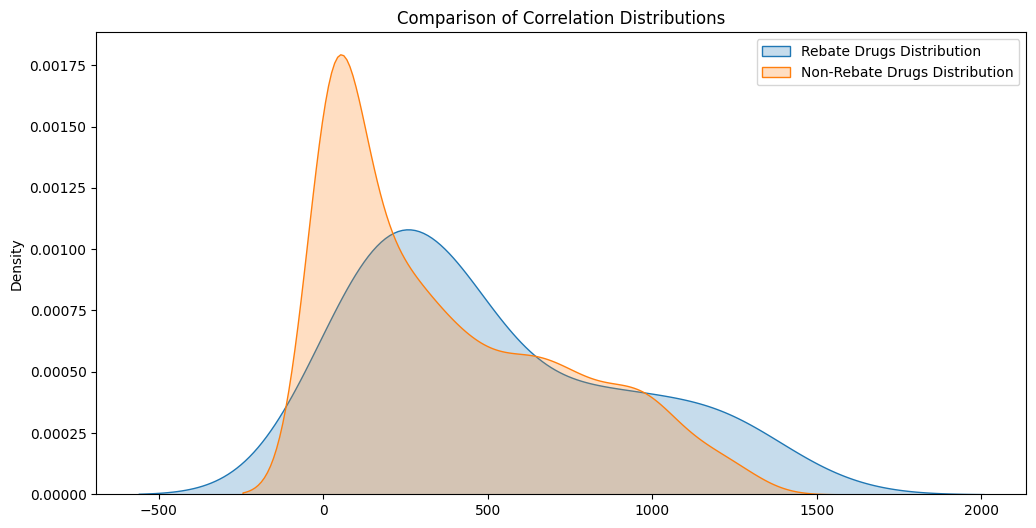

In [ ]:
# T-test를 통한 통계적 검정
t_stat, p_value = ttest_ind(result_list, result_list3, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# 추천도 분포 비교 시각화
plt.figure(figsize=(12, 6))
sns.kdeplot(result_list, label='Rebate Drugs Distribution', fill=True)
sns.kdeplot(result_list3, label='Non-Rebate Drugs Distribution', fill=True)
plt.title("Comparison of Correlation Distributions")
plt.legend()
plt.show()